In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import csv
learning_rate = 0.001
epoch = 200000
lamda = 1

In [2]:
def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-1.0*z)))

In [3]:
def Costfunc(Y,h,Theta):
    m = len(Y)
    Theta_1 = Theta[1:]
    J = 0.0
    J = (-1.0/(2*m))*(np.matmul(np.transpose(Y),np.log(h)) + np.matmul(np.transpose(np.ones((891,1)) - Y),np.log(np.ones((891,1)) - h))) + (lamda/(2*m))*(np.matmul(np.transpose(Theta_1),Theta_1))                                                            
    return J[0][0]

In [4]:
def GradientDescent(X,Y,Theta):
    m = len(X)
    x1,cost1 = [],[]
    for i in range(epoch):
        z = np.matmul(X,Theta)
        h = sigmoid(z)
        loss = h - Y
        gradient = np.matmul(np.transpose(X),loss)/(2*m)
        Theta = Theta - (learning_rate*gradient)
        cost = Costfunc(Y,h,Theta)
        x1.append(i)
        cost1.append(cost)
    return Theta,x1,cost1

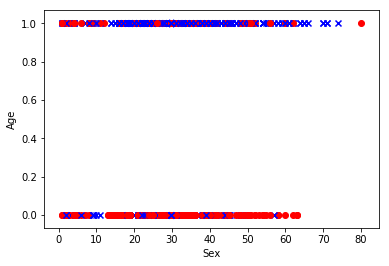

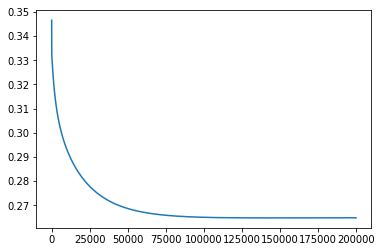

Accuracy is: 
79.01234567901234
Writing complete


In [5]:
Z = pd.read_csv('./train.csv',header = None , usecols = [1,2,4,5,6,7])
Z = Z.drop(0, 0)
for i, array in enumerate(Z[5]):
    try:
        int(array)
    except:
        Z[5][i+1] = 29.7
X = np.array(Z.drop(1,1))
Y = np.array(Z[1])
for i,val in enumerate(X):
    Y[i] = float(Y[i])
    if(val[1] == 'male'):
        val[1] = 1
    else:
        val[1] = 0
    for k in range(len(val)):
        val[k] = float(val[k])
for i in range(len(X)):
    if(Y[i] == 0):
        plt.scatter(X[i][2],X[i][1],marker = 'x' , color = 'b')
    else:
        plt.scatter(X[i][2],X[i][1],marker = 'o' ,color = 'r')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()
plt.clf()
X = X.astype(float)
Y = Y.astype(float)
X = np.reshape(X,(891,5))
Y = np.reshape(Y,(891,1))
Theta =np.zeros((5,1))
#cost1 = np.asarray(cost1)
Theta,x1,cost1 = GradientDescent(X,Y,Theta)
#for i in range(len(x1)):
    #print("i is : {} cst is : {}".format(x1[i],cost1[i]))
    #plt.scatter(x1[i],cost1[i],marker = 'x')
plt.plot(x1,cost1,'-')
plt.show()
pred = []
for i in range(len(X)):
    a = sigmoid(np.matmul(X[i],Theta))
    if(a >= 0.5):
        a = 1.0
        pred.append(a)
    else:
        a = 0.0
        pred.append(a)
count = 0
for i in range(len(Y)):
    if(Y[i]==pred[i]):
        count = count+1
print("Accuracy is: ")
print(count*100/len(X))
Theta


DF = pd.read_csv('./test.csv',header = None , usecols = [1,3,4,5,6])
DF = DF.drop(0, 0)
for i, array in enumerate(DF[4]):
    try:
        int(array)
    except:
        DF[4][i+1] = 29.7
X_test = np.array(DF)
for i,val in enumerate(X_test):
    if(val[1] == 'male'):
        val[1] = 1
    else:
        val[1] = 0
    for k in range(len(val)):
        val[k] = float(val[k])
        
X_test = X_test.astype(float)

X_test = np.reshape(X_test,(418,5))

pred_test = []
for i in range(len(X_test)):
    a = sigmoid(np.matmul(X_test[i],Theta))
    if(a>=0.5):
        a = 1.0
        pred_test.append(a)
    else:
        a = 0.0
        pred_test.append(a)
myData = [["PassengerId", "Survived"]]
for i in range(len(DF)):
    arr = [i+892, int(pred_test[i])]
    myData.append(arr)
myFile = open('example2.csv', 'w+')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(myData)
     
print("Writing complete")